In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


In [2]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt


warnings.filterwarnings(action='ignore')

In [3]:
data_path = '/kaggle/input/competitive-data-science-predict-future-sales/'

df_train = pd.read_csv(data_path+'sales_train.csv')
print(df_train.shape)
df_train.head()

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
df_test = pd.read_csv(data_path+'test.csv')
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [5]:
df_samplesub = pd.read_csv(data_path+'sample_submission.csv')
df_samplesub.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


## Total Sales per Month

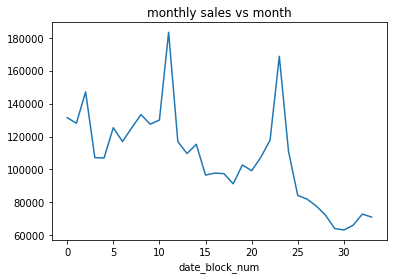

In [6]:
df_train.groupby('date_block_num')['item_cnt_day'].sum().plot()
plt.title('monthly sales vs month')
plt.show()

## Sales per Item per Month

In [7]:
def top_item_sales(part = (0,10)):
    
    d = df_train.groupby(['item_id','date_block_num'])['item_cnt_day'].sum()

    #top 10 sold items
    topitems = df_train.groupby([ 'item_id'])['item_cnt_day'].sum().sort_values(ascending=False)[part[0]:part[1]]
    top_items_id = topitems.index
    print(top_items_id)

    df_itemVSmonth = pd.DataFrame(data = df_train['date_block_num'].unique(), columns = ['date_block_num'])
    df_itemVSmonth[top_items_id] = 0
    for item in top_items_id:
        pos = d[item].index
        vals = d[item].values
        df_itemVSmonth[item][pos] = vals
    return df_itemVSmonth, top_items_id

In [8]:
def plot_itemsVSmonth(shape=(10,1), title='title', items=[0,1]):
    m,n = shape
    fig, axes = plt.subplots(m,n, figsize=(5*n,5*m))
    x = df_itemVSmonth['date_block_num']
    for i,item in enumerate(items):
        column = df_itemVSmonth[item]
        if n!=1:
            ax =axes[i//n][i%n]
        else:
            ax =axes[i]
        sns.lineplot(x=x, y=column, ax=ax, marker='o')
    #     print(axes[i//n][i%n])
    #     df_itemVSmonth[top_items_id].plot()
    plt.title(title)
    plt.show()

Int64Index([20949,  2808,  3732, 17717,  5822,  3734,  6675,  3731,  1855,
            16787,  7856,  4181,  3331,  2445,  2308,  4870,  6738,  2814,
             1830, 11373,  6503,  5823,  3733,  6740,  5821, 16790, 11370,
             6497,  5272,  3183,  7894,  6457,  3928,  2269, 15044, 13071,
             6466,  6498,  4178, 22088,  5672,  7018,  2416,  7096,  7893,
             2753, 10210,  1495,  3329,  6495],
           dtype='int64', name='item_id')
Sale of Top 50 items Vs Month


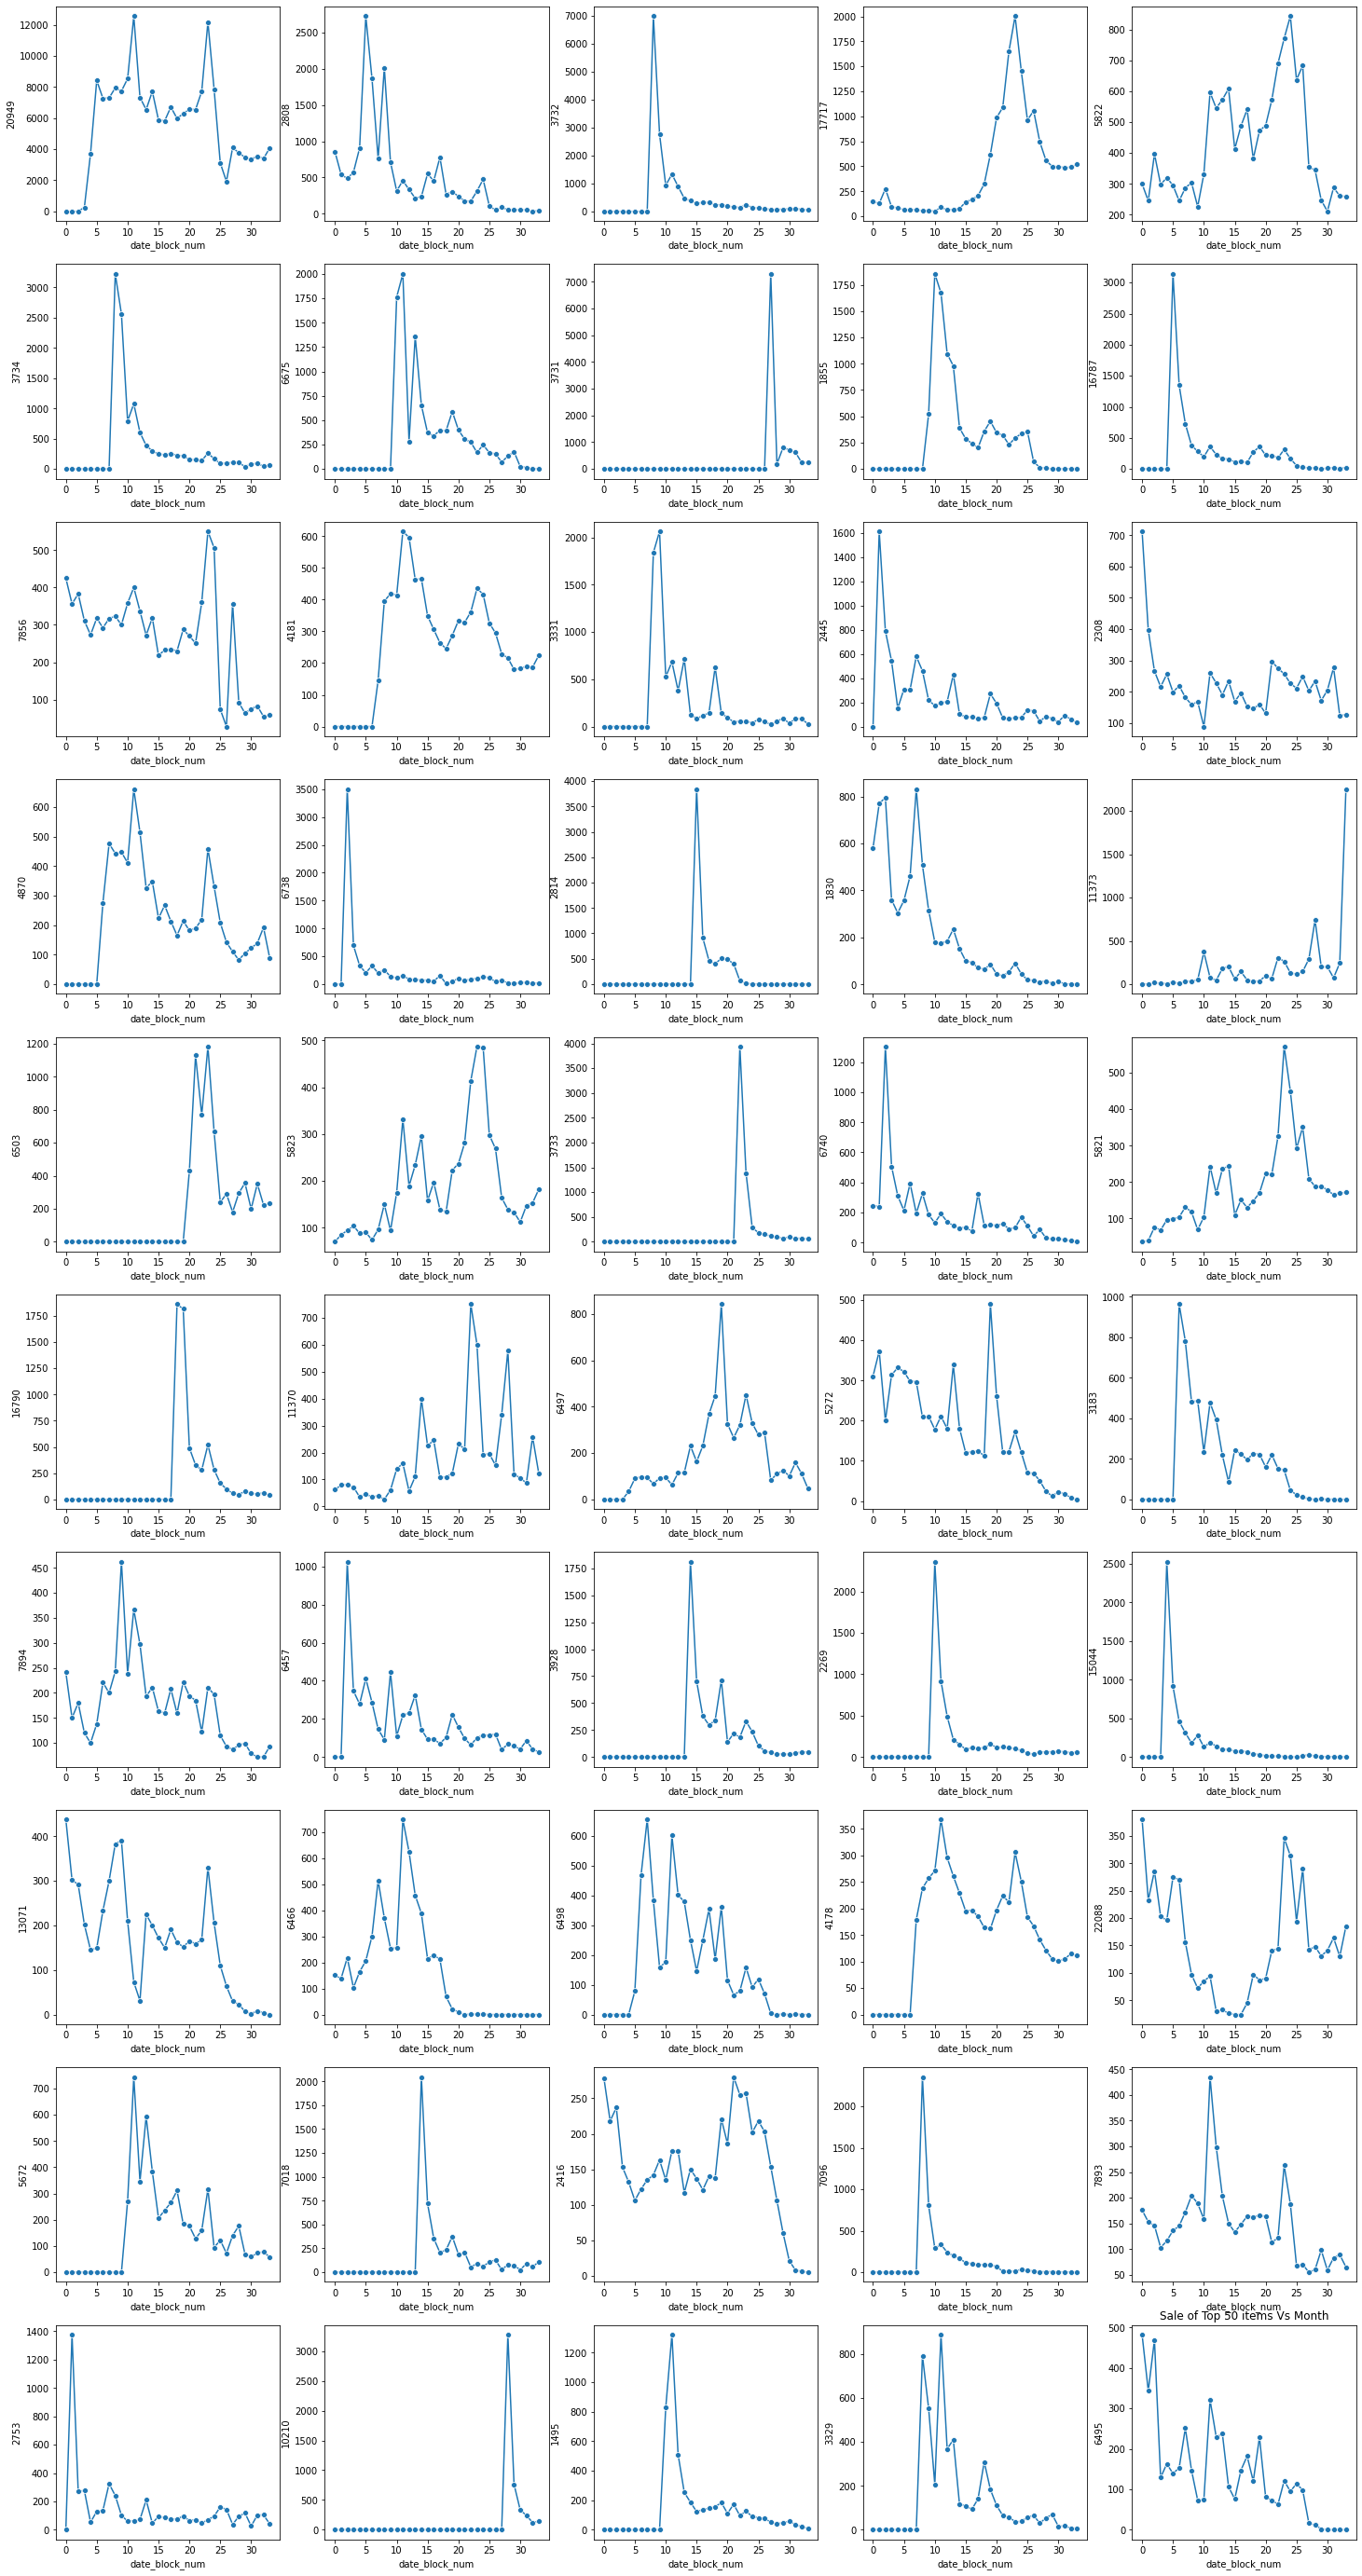

CPU times: user 7.16 s, sys: 335 ms, total: 7.49 s
Wall time: 7.25 s


In [9]:
%%time
num = 50
part = (0,num)
df_itemVSmonth, top_items_id = top_item_sales(part = part)
title = f'Sale of Top {num} items Vs Month'
print(title)
plot_itemsVSmonth((10,5), title=title, items=top_items_id)

Int64Index([11270, 11307, 11309, 11310, 11322, 11384, 11386, 11390, 11393,
            11410, 11421, 11423, 10896, 10909, 10878, 10682, 10505, 10519,
            10522, 10562, 10564, 10565, 10570, 10577, 10607, 10639, 10640,
            10648, 10850, 10681, 10655, 22169, 10752, 10835, 10695, 10799,
            10696, 10698, 10705, 10753, 10685, 10745,  8515,  4591, 13477,
             7547, 13474, 18062, 11871,  1590],
           dtype='int64', name='item_id')
Sale of Bottom 50 items Vs Month


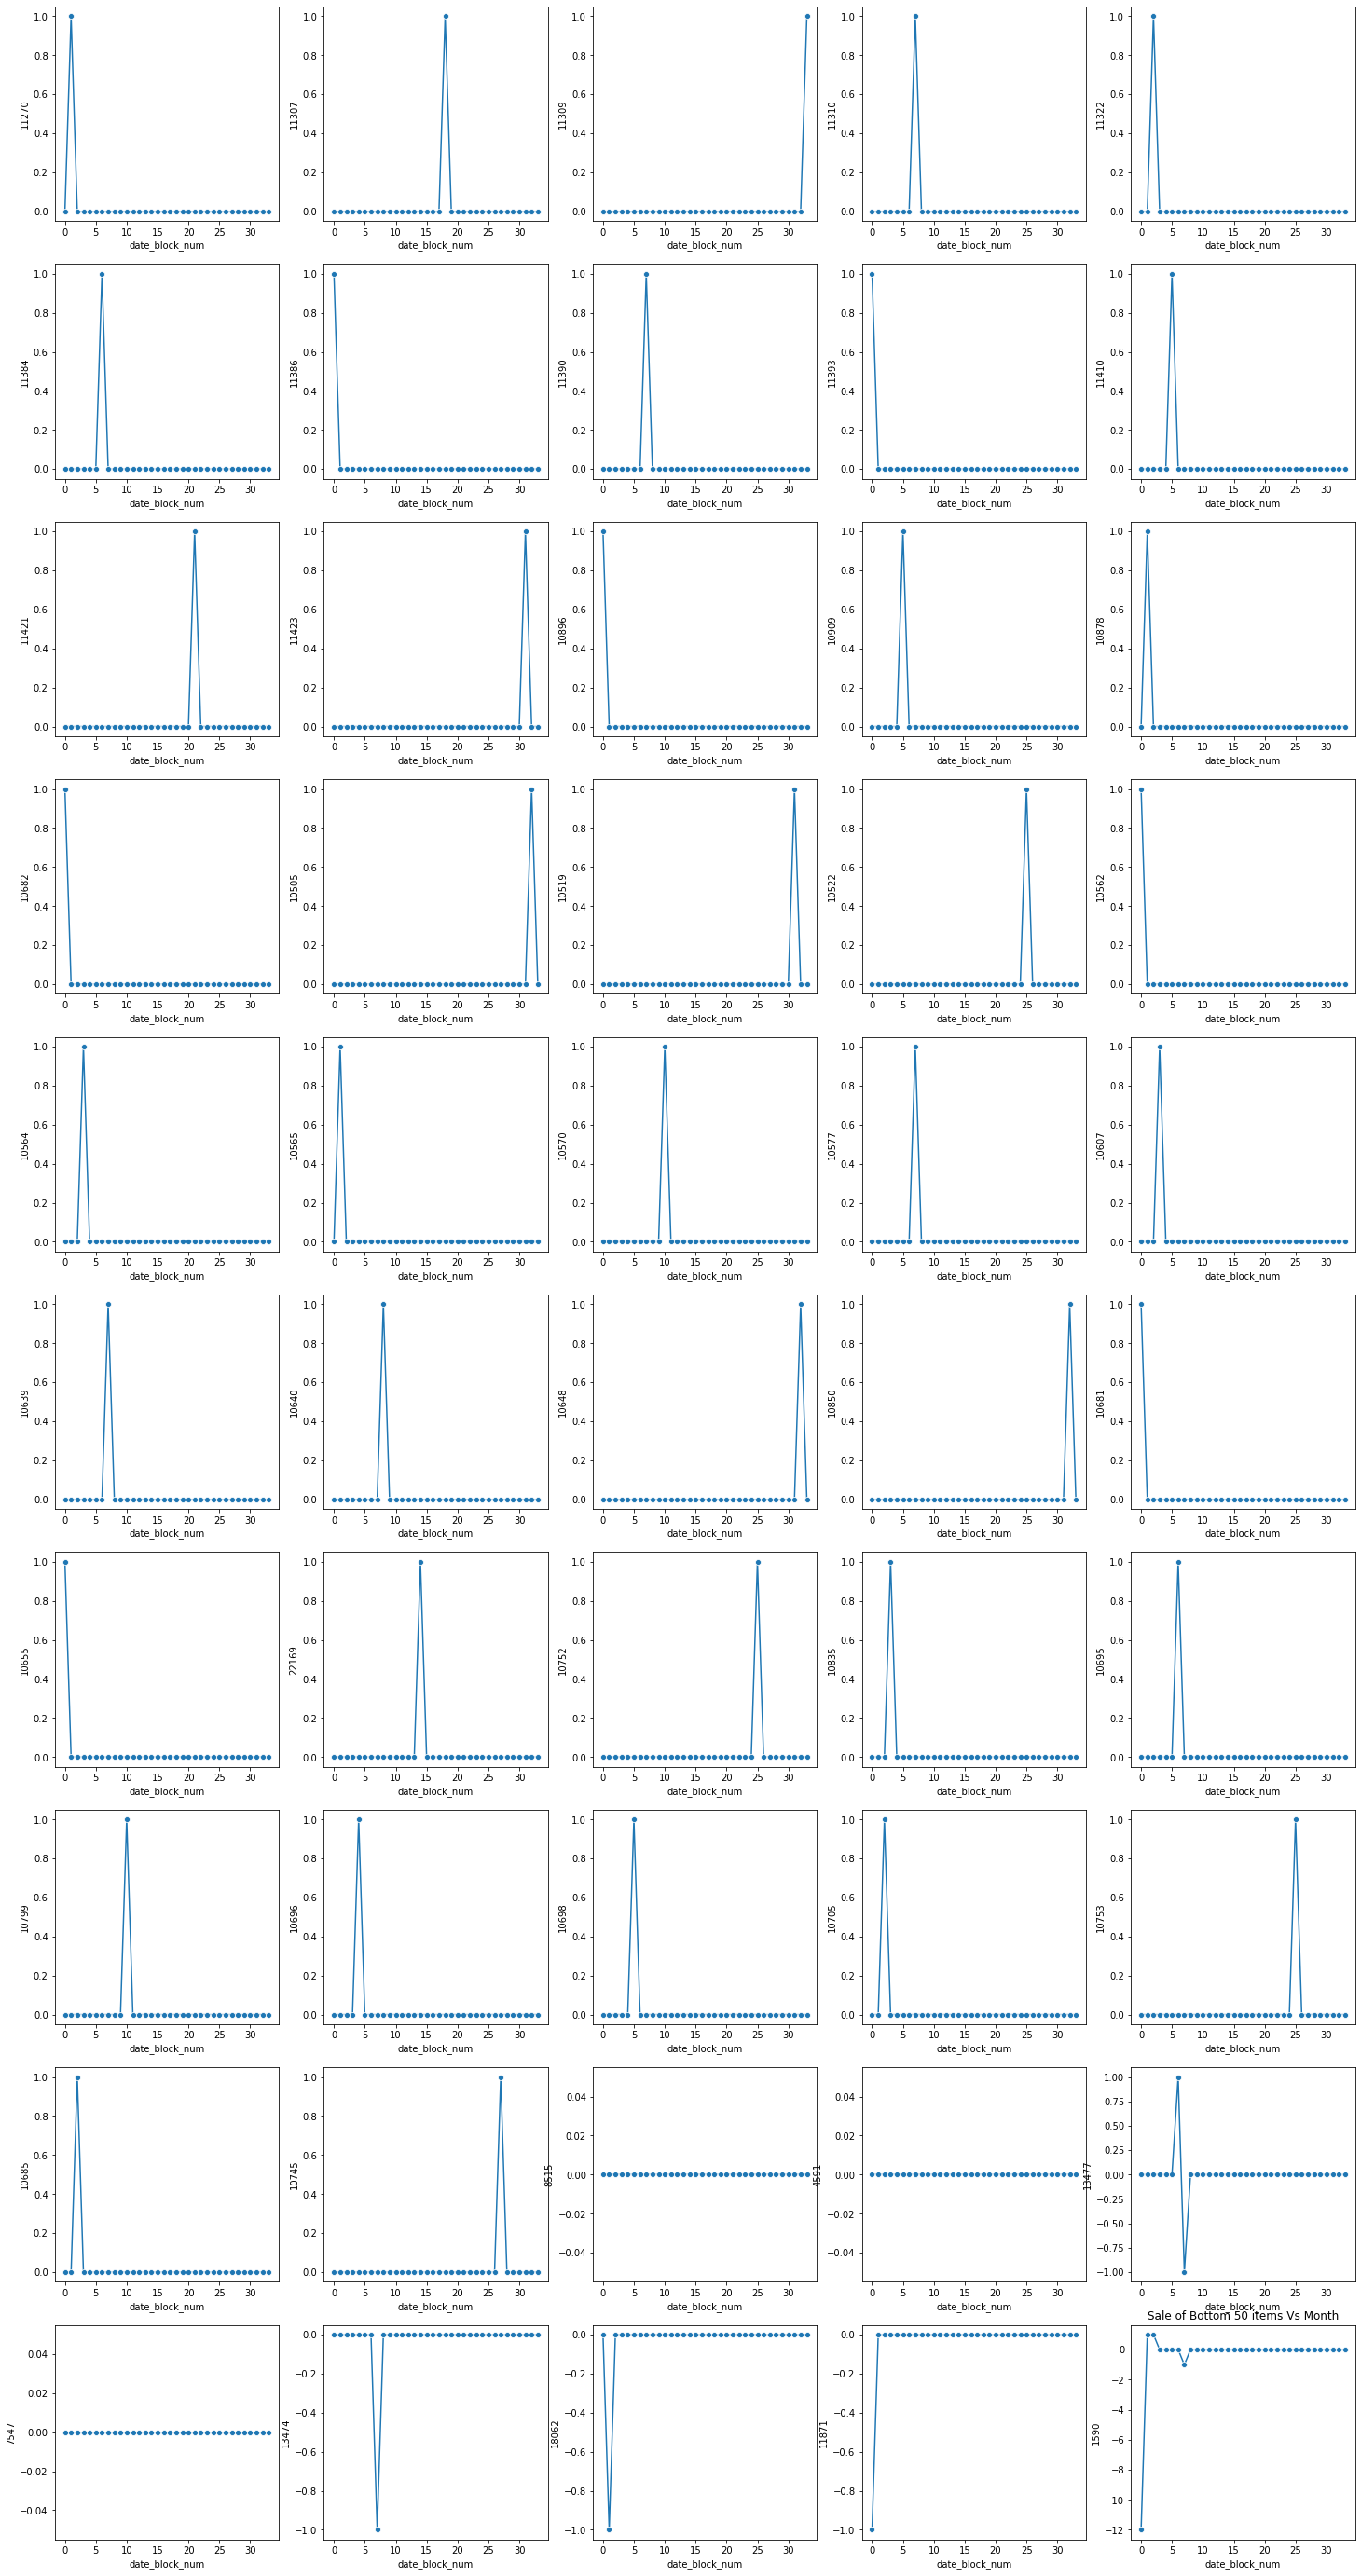

CPU times: user 7.02 s, sys: 284 ms, total: 7.31 s
Wall time: 7.06 s


In [10]:
%%time
num = 50
part = (-num,df_train['item_id'].unique().size)
df_itemVSmonth, bottom_items_id = top_item_sales(part = part)
title = f'Sale of Bottom {num} items Vs Month'
print(title)
plot_itemsVSmonth((10,5), title=title, items=bottom_items_id)

In [11]:
df_train.groupby([ 'item_id'])['item_cnt_day'].sum().sort_values(ascending=False).shape

(21807,)

Int64Index([ 6252, 16156, 19067, 15646,  3337, 17785,  1847,  3140, 21918,
            15054,  6134,  2534, 10051,  4391,  3871, 12551, 11054, 10660,
            11065,  2284, 14337, 11497, 15043, 16832,  8092, 17661, 18476,
            19688, 16180,  9254,  6308,  4242, 14389,  9033,  4362,  8702,
            16170, 15022, 13439, 17374,  5552, 11967,  4840,  9255,  2768,
            15520,  4610,  2400, 15238, 17822],
           dtype='int64', name='item_id')
Sale of middle 50 items Vs Month


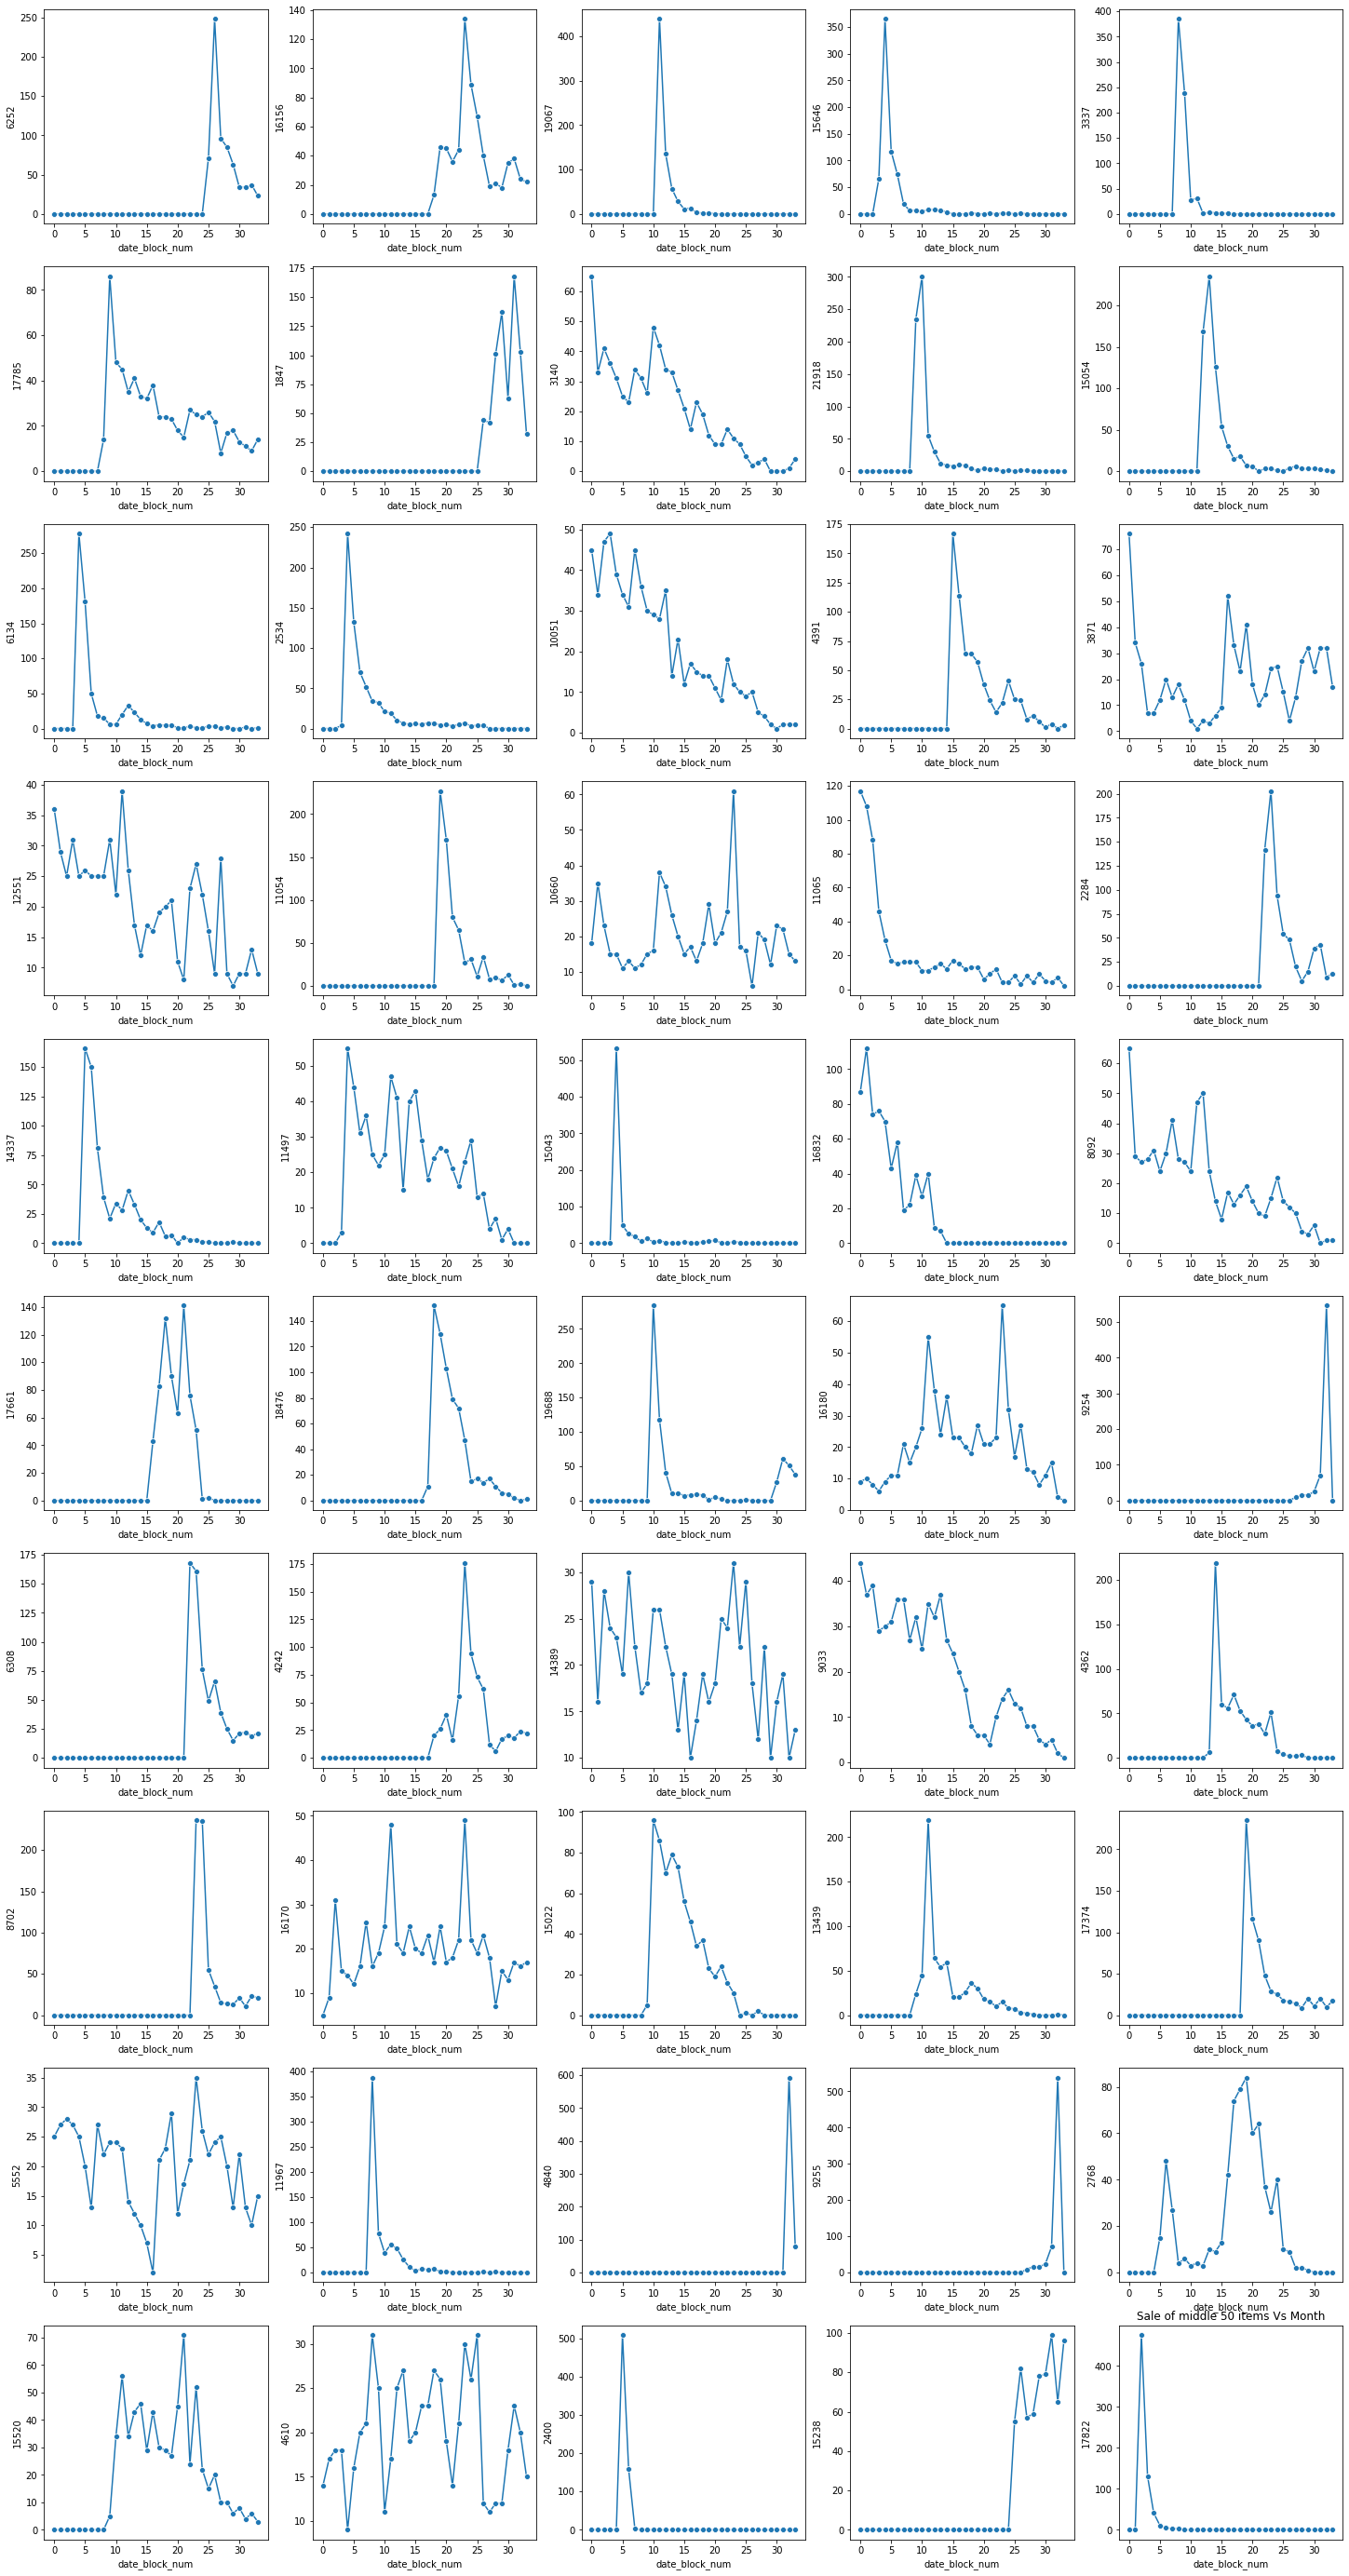

CPU times: user 7.26 s, sys: 305 ms, total: 7.56 s
Wall time: 7.32 s


In [12]:
%%time
num = 50
part = (1000, 1050) #num of unique item_id is 21807
df_itemVSmonth, items_id = top_item_sales(part = part)
title = f'Sale of middle {num} items Vs Month'
print(title)
plot_itemsVSmonth((10,5), title=title, items=items_id)

## Sales per Shop per month

In [13]:
def top_shop_sales(part = (0,10)):
    
    d = df_train.groupby(['shop_id','date_block_num'])['item_cnt_day'].sum()

    #top 10 sold shops
    topshops = df_train.groupby([ 'shop_id'])['item_cnt_day'].sum().sort_values(ascending=False)[part[0]:part[1]]
    top_shops_id = topshops.index
    print(top_shops_id)

    df_shopVSmonth = pd.DataFrame(data = df_train['date_block_num'].unique(), columns = ['date_block_num'])
    df_shopVSmonth[top_shops_id] = 0
    for item in top_shops_id:
        pos = d[item].index
        vals = d[item].values
        df_shopVSmonth[item][pos] = vals
    return df_shopVSmonth, top_shops_id

In [14]:
def plot_shopsVSmonth(shape=(10,1), title='title', items=[0,1]):
    m,n = shape
    fig, axes = plt.subplots(m,n, figsize=(5*n,5*m))
    x = df_shopVSmonth['date_block_num']
    for i,item in enumerate(items):
        column = df_shopVSmonth[item]
        if n!=1:
            ax =axes[i//n][i%n]
        else:
            ax =axes[i]
        sns.lineplot(x=x, y=column, ax=ax, marker='o')
    #     print(axes[i//n][i%n])
    #     df_itemVSmonth[top_items_id].plot()
    plt.title(title)
    plt.show()

60
Int64Index([31, 25, 54, 28, 42, 57, 27,  6, 58, 46, 56, 50, 12, 19, 15, 35, 21,
            26, 47,  7, 18, 24, 55, 53, 16, 30, 22, 29, 38, 43, 52, 41, 59, 51,
            14, 37, 44,  4,  5, 45,  2,  3, 17, 48, 10, 13, 49, 39,  9,  0, 32,
            23, 34,  1, 20, 33, 40,  8, 11, 36],
           dtype='int64', name='shop_id')
Sale of All shops Vs Month


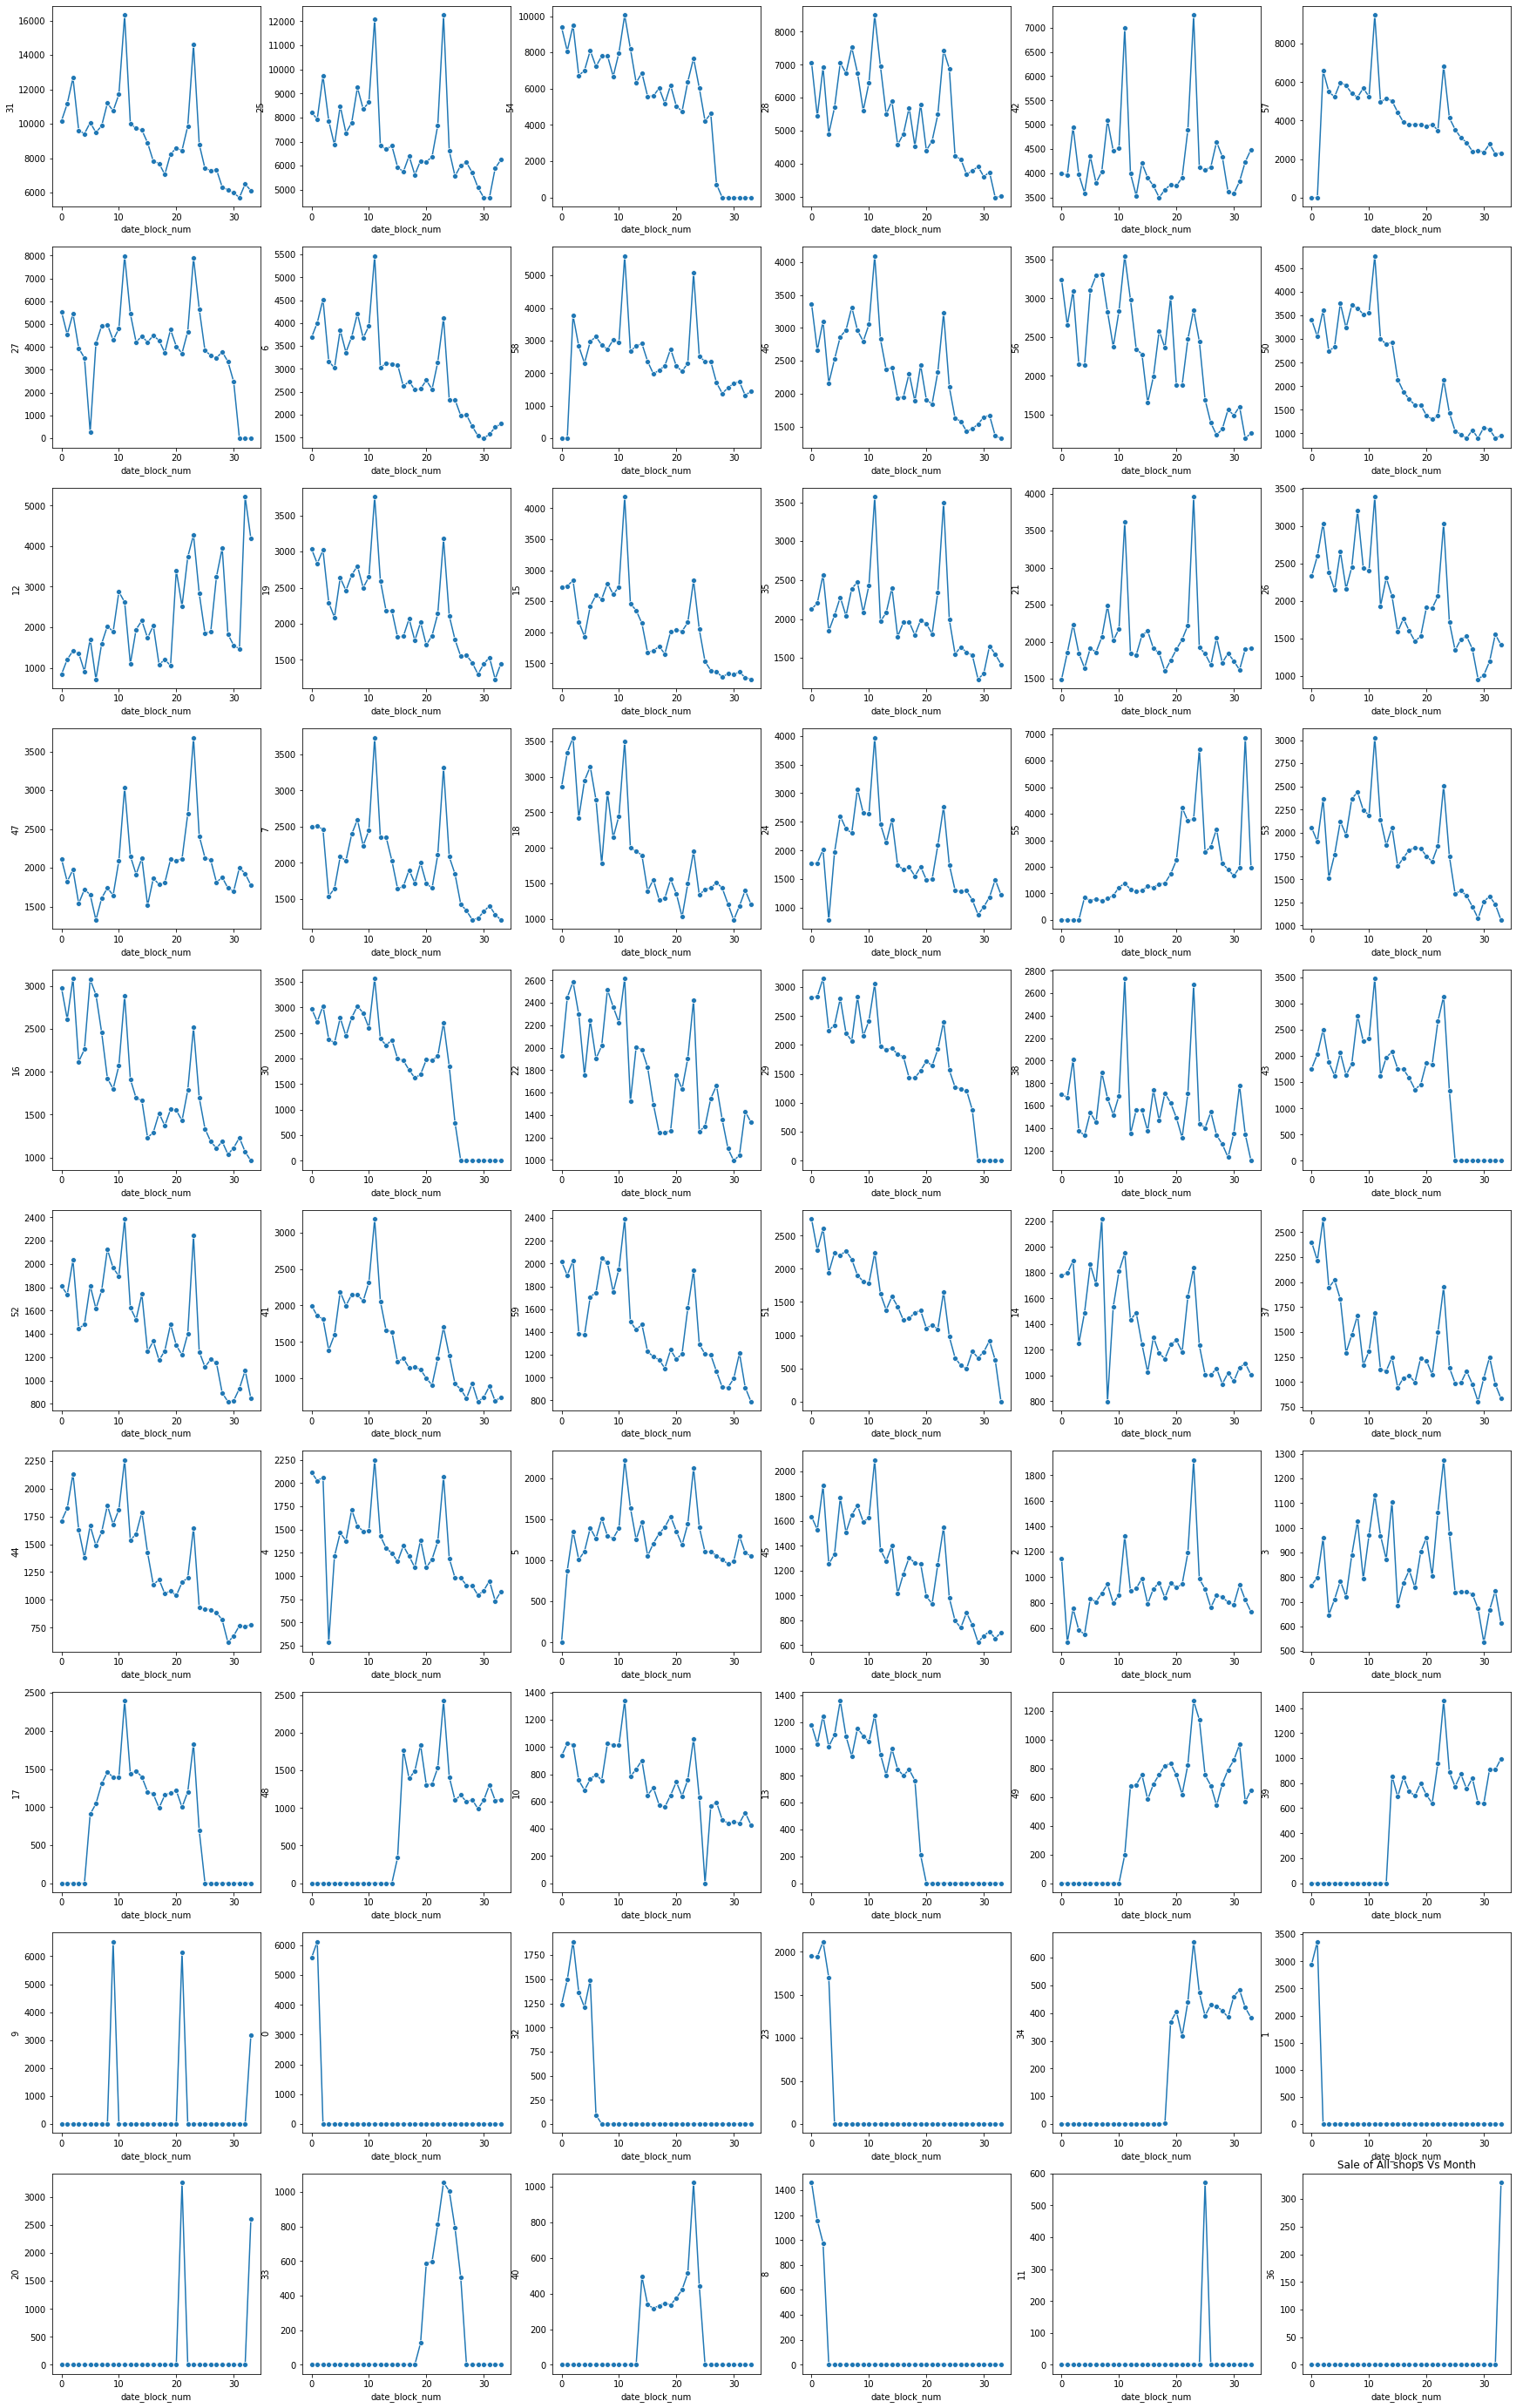

CPU times: user 7.92 s, sys: 292 ms, total: 8.21 s
Wall time: 7.96 s


In [15]:
%%time
#plot of all shops 
num = df_train['shop_id'].unique().size
print(num)
part = (0,num) # max 50 shops
df_shopVSmonth, top_shops_id = top_shop_sales(part = part)
title = f'Sale of All shops Vs Month'
print(title)
plot_shopsVSmonth((10,6), title=title, items=top_shops_id)